In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

from textblob import TextBlob

import unicodedata
import sys
import nltk


from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

import unicodedata

from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score


from textblob import TextBlob

import seaborn as sb

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1")

In [3]:
print(df.head())

   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....           

In [5]:
dfYou = pd.read_csv("YoutubeCommentsDataSet.csv", encoding = 'utf-8')
print(dfYou.head())

                                             Comment Sentiment
0  lets not forget that apple pay in 2014 require...   neutral
1  here in nz 50 of retailers don’t even have con...  negative
2  i will forever acknowledge this channel with t...  positive
3  whenever i go to a place that doesn’t take app...  negative
4  apple pay is so convenient secure and easy to ...  positive


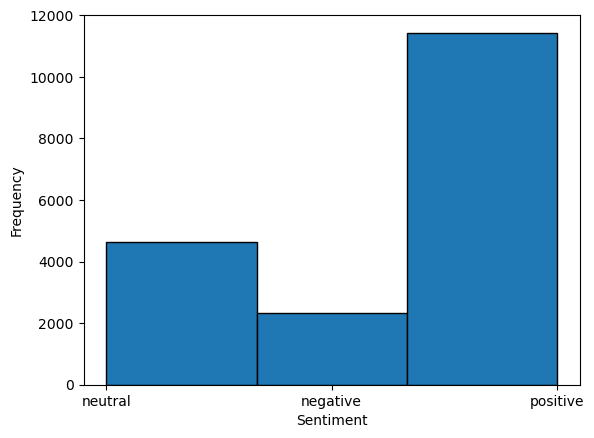

In [6]:
plt.figure()  # Create a new figure for each column
plt.hist(dfYou["Sentiment"], bins=3, edgecolor='black')
plt.xlabel("Sentiment")
plt.ylabel('Frequency')
plt.show()

In [11]:
dftwittrain = pd.read_csv("twitter_training.csv", encoding = "ISO-8859-1")
print(dftwittrain.head())



   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


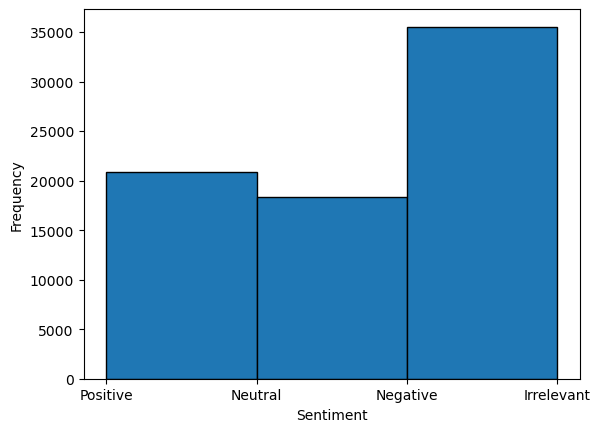

In [13]:

plt.figure()  # Create a new figure for each column
plt.hist(dftwittrain.iloc[:, 2], bins=3, edgecolor='black')
plt.xlabel("Sentiment")
plt.ylabel('Frequency')
plt.show()

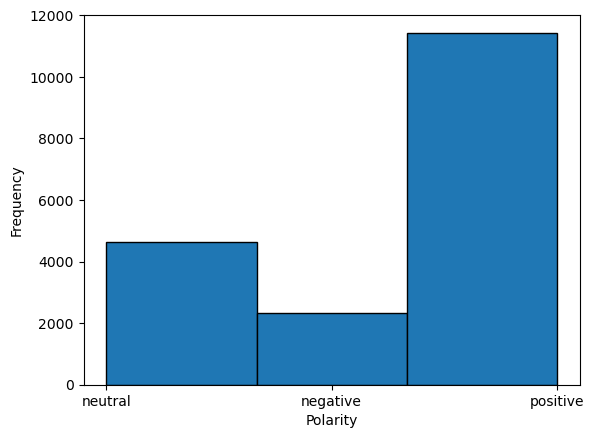

In [15]:
plt.figure()  # Create a new figure for each column
plt.hist(dfYou["Sentiment"], bins=3, edgecolor='black')
plt.xlabel("Polarity")
plt.ylabel('Frequency')
plt.show()

   Year  Month  Day Time of Tweet  \
0  2018      8   18       morning   
1  2018      8   18          noon   
2  2017      8   18         night   
3  2022      6    8       morning   
4  2022      6    8          noon   

                                                text sentiment     Platform  
0              What a great day!!! Looks like dream.  positive    Twitter    
1     I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                     Don't angry me  negative     Facebook  
3  We attend in the class just for listening teac...  negative    Facebook   
4                  Those who want to go, let them go  negative   Instagram   


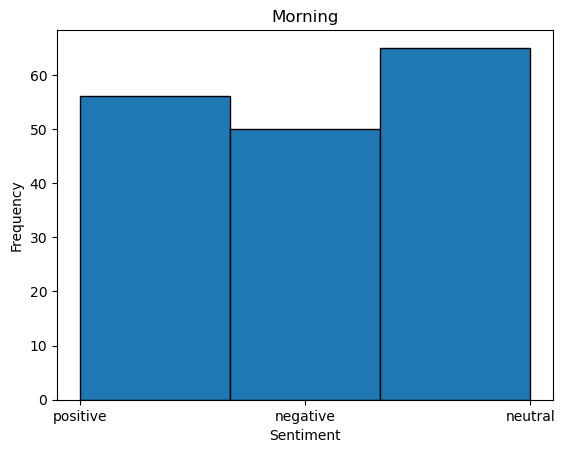

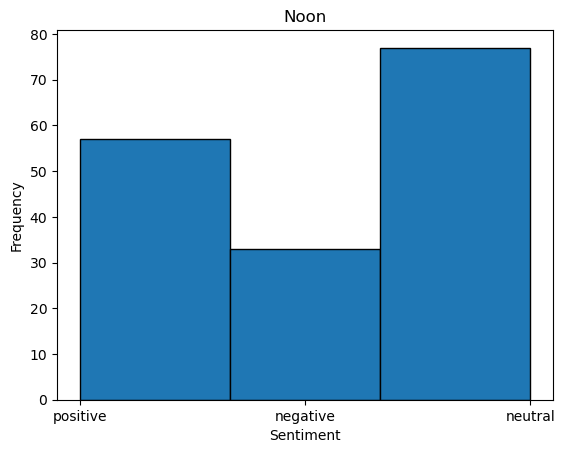

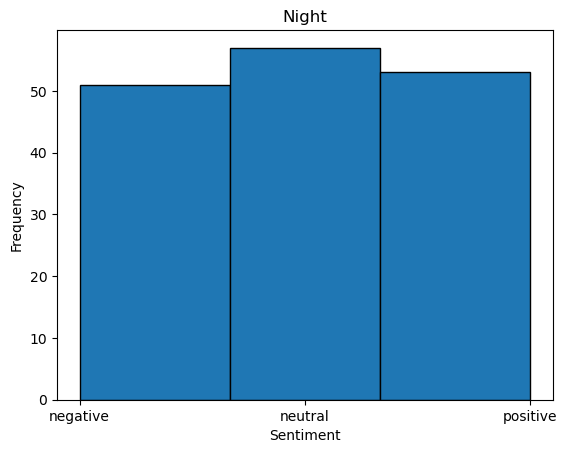

In [17]:
dfsent = pd.read_csv("sentiment_analysis.csv", encoding = "ISO-8859-1")
print(dfsent.head())


#create the subset of all visit data that are below a z-score of 3
subsetMorn = dfsent[dfsent["Time of Tweet"] == "morning"]
subsetNoon = dfsent[dfsent["Time of Tweet"] == "noon"]
subsetNight = dfsent[dfsent["Time of Tweet"] == "night"]

plt.figure()  # Create a new figure for each column
plt.hist(subsetMorn["sentiment"], bins=3, edgecolor='black')
plt.title("Morning")
plt.xlabel("Sentiment")
plt.ylabel('Frequency')
plt.show()

plt.figure()  # Create a new figure for each column
plt.hist(subsetNoon["sentiment"], bins=3, edgecolor='black')
plt.title("Noon")
plt.xlabel("Sentiment")
plt.ylabel('Frequency')
plt.show()

plt.figure()  # Create a new figure for each column
plt.hist(subsetNight["sentiment"], bins=3, edgecolor='black')
plt.title("Night")
plt.xlabel("Sentiment")
plt.ylabel('Frequency')
plt.show()

In [19]:
print(dfsent.head())

   Year  Month  Day Time of Tweet  \
0  2018      8   18       morning   
1  2018      8   18          noon   
2  2017      8   18         night   
3  2022      6    8       morning   
4  2022      6    8          noon   

                                                text sentiment     Platform  
0              What a great day!!! Looks like dream.  positive    Twitter    
1     I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                     Don't angry me  negative     Facebook  
3  We attend in the class just for listening teac...  negative    Facebook   
4                  Those who want to go, let them go  negative   Instagram   


New Material for Milestone 2

In [22]:
grouped_data_Month = dfsent.groupby('Month')


I will use the dfYou dataset to train the sentiment model.

In [25]:
print(dfYou.head())

                                             Comment Sentiment
0  lets not forget that apple pay in 2014 require...   neutral
1  here in nz 50 of retailers don’t even have con...  negative
2  i will forever acknowledge this channel with t...  positive
3  whenever i go to a place that doesn’t take app...  negative
4  apple pay is so convenient secure and easy to ...  positive


In [27]:
dfYou = pd.get_dummies(dfYou, columns=['Sentiment'])

# Print the DataFrame with dummy variables
print(dfYou)

                                                 Comment  Sentiment_negative  \
0      lets not forget that apple pay in 2014 require...               False   
1      here in nz 50 of retailers don’t even have con...                True   
2      i will forever acknowledge this channel with t...               False   
3      whenever i go to a place that doesn’t take app...                True   
4      apple pay is so convenient secure and easy to ...               False   
...                                                  ...                 ...   
18403  i really like the point about engineering tool...               False   
18404  i’ve just started exploring this field and thi...               False   
18405  excelente video con una pregunta filosófica pr...               False   
18406  hey daniel just discovered your channel a coup...               False   
18407  this is great focus is key a playful approach ...               False   

       Sentiment_neutral  Sentiment_pos

In [29]:
#make all review data lower case

def lower_data(reviews):
    LowerList = []
    for i in reviews:
        LowerList.append(str(i).lower())
    return LowerList


In [31]:
se1 = lower_data(dfYou['Comment'])



se2 = pd.Series(se1)
dfYou['CommentLower'] = se2.values


#convert string data back to raw strings
dfYou['CommentRaw'] = dfYou['CommentLower'].apply(r'{}'.format)

print(dfYou['CommentRaw'])
print(dfYou.head(5))

0        lets not forget that apple pay in 2014 require...
1        here in nz 50 of retailers don’t even have con...
2        i will forever acknowledge this channel with t...
3        whenever i go to a place that doesn’t take app...
4        apple pay is so convenient secure and easy to ...
                               ...                        
18403    i really like the point about engineering tool...
18404    i’ve just started exploring this field and thi...
18405    excelente video con una pregunta filosófica pr...
18406    hey daniel just discovered your channel a coup...
18407    this is great focus is key a playful approach ...
Name: CommentRaw, Length: 18408, dtype: object
                                             Comment  Sentiment_negative  \
0  lets not forget that apple pay in 2014 require...               False   
1  here in nz 50 of retailers don’t even have con...                True   
2  i will forever acknowledge this channel with t...               False   


In [33]:
# Uses list comprehension to remove punct
def removePunct(column):
    
    punct = dict.fromkeys(
    (i for i in range(sys.maxunicode)
        if unicodedata.category(chr(i)).startswith("P")
    ),
    None
    )
    
    check = [string.translate(punct) for string in column]
    return check



check1 = removePunct(dfYou["CommentRaw"])

se2 = pd.Series(check1)
dfYou['CommentRaw'] = se2.values

In [35]:
#find stopwords in comment data
stop_words = stopwords.words("english")

In [37]:
# remove the english stop words specified in nltk 
Token_List = []
Token_List = [word for word in Token_List if word not in stop_words]

In [39]:
#NLTK Porter Stemmer by Martin Porter
#Stem words to reduce the total amound of data that has to be examined for the model.
stemmer = PorterStemmer()
def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

In [41]:
stemmed = []

for text in dfYou["CommentRaw"]:
    stemmed_sentence = stem_text(text)
    stemmed.append(stemmed_sentence)

In [43]:
dfYou['stemmed'] = pd.DataFrame({'stemmed': stemmed})

In [45]:
#vectorizer = TfidfVectorizer()

#numerical_data = vectorizer.fit_transform(dfYou['stemmed'])

In [47]:
x = dfYou['stemmed']

# Get the 3 sentiment columns
y_one_hot = dfYou[['Sentiment_negative', 'Sentiment_neutral', 'Sentiment_positive']]

#Convert the one-hot encoded format into a single column of labels
y_labels = y_one_hot.values.argmax(axis=1)

In [49]:
#test split our data
x_train, x_test, y_train, y_test = train_test_split(x, y_labels, test_size=0.2)


In [51]:
#Instantiate Vectorizer 
vectorizer = TfidfVectorizer(max_features=5000) 

# Fit and Transform on TRAINING Text Data
X_train_tfidf = vectorizer.fit_transform(x_train) 

# Transform on TEST Text
X_test_tfidf = vectorizer.transform(x_test) 

#Instantiate and Fit Scaler applied to TF-IDF data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf) 
X_test_scaled = scaler.transform(X_test_tfidf) 

#Train a Logistic Regression
classifier = LogisticRegression() 
classifier.fit(X_train_scaled, y_train) 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# Now you can predict and evaluate using X_test_scaled
y_pred = classifier.predict(X_test_scaled)



# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6797935904399782
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.45      0.45       477
           1       0.48      0.53      0.50       894
           2       0.82      0.78      0.80      2311

    accuracy                           0.68      3682
   macro avg       0.58      0.59      0.59      3682
weighted avg       0.69      0.68      0.68      3682



In [55]:
#We will now setup the daytime subset sentiment data 

print(subsetMorn.head())
print(subsetNoon.head())
print(subsetNight.head())

    Year  Month  Day Time of Tweet  \
0   2018      8   18       morning   
3   2022      6    8       morning   
6   2017     12   28       morning   
9   2018      5   28       morning   
12  2016      5   15       morning   

                                                 text sentiment    Platform  
0               What a great day!!! Looks like dream.  positive   Twitter    
3   We attend in the class just for listening teac...  negative   Facebook   
6   2 am feedings for the baby are fun when he is ...  positive   Facebook   
9   Today first time I arrive in the boat. Its ama...  positive   Facebook   
12       My Sharpie is running DANGERously low on ink  negative   Facebook   
    Year  Month  Day Time of Tweet  \
1   2018      8   18          noon   
4   2022      6    8          noon   
7   2017     12   28          noon   
10  2021     11    7          noon   
13  2016     11   15          noon   

                                                 text sentiment     Platfo

In [101]:
seMo = lower_data(subsetMorn["text"])
seNo = lower_data(subsetNoon["text"])
seNi = lower_data(subsetNight["text"])

seMo2 = pd.Series(seMo)
seNo2 = pd.Series(seNo)
seNi2 = pd.Series(seNi)

dfMorn = seMo2.to_frame()
dfNoon = seNo2.to_frame()
dfNight = seNi2.to_frame()


dfMorn = dfMorn.iloc[1:]
dfNoon = dfNoon.iloc[1:]
dfNight = dfNight.iloc[1:]

print(dfNight)
print(dfNoon.shape)
print(dfNoon)
print(dfNight)


#convert string data back to raw strings

dfMorn = dfMorn.map(r'{}'.format)
dfNoon = dfNoon.map(r'{}'.format)
dfNight = dfNight.map(r'{}'.format)

#print(dfMorn.shape)
print(dfNoon.shape)
print(dfNight.shape)


                                                     0
1                      its night 2 am, feeling neutral
2                                          both of you
3    i really really like the song cardigan by tayl...
4        always somewhere i miss you where i have been
5                i`ve been sick for the past few days 
..                                                 ...
156  gettn ready to take a trip to jersey my dad`s ...
157  home until tomorrow. did my running and spinni...
158             no it`s not sad. should make you proud
159  according to , a quarter of families under six...
160   congratulations ! you guys finish a month ear...

[160 rows x 1 columns]
(166, 1)
                                                     0
1                    those who want to go, let them go
2                                           soooo high
3                  love is something like e=mc^2 rules
4    i want to go to music tonight but i lost my vo...
5        i don't care, who are y

In [105]:

MornNoPunct = removePunct(dfMorn[0])
NoonNoPunct = removePunct(dfNoon[0])
NightNoPunct = removePunct(dfNight[0])


In [107]:
#find stopwords in comment data
stop_words = stopwords.words("english")

In [109]:
#NLTK Porter Stemmer by Martin Porter
#Stem words to reduce the total amound of data that has to be examined for the model.
stemmer = PorterStemmer()
def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

In [111]:
stemmedMorn = []
stemmedNoon = []
stemmedNight = []

for text in MornNoPunct:
    stemmed_sentence_Mo = stem_text(text)
    stemmedMorn.append(stemmed_sentence_Mo)  

for text in NoonNoPunct:
    stemmed_sentence_No = stem_text(text)
    stemmedNoon.append(stemmed_sentence_No)

for text in NightNoPunct:
    stemmed_sentence_Ni = stem_text(text)
    stemmedNight.append(stemmed_sentence_Ni)

In [113]:
x1 = stemmedMorn
x2 = stemmedNoon
x3 = stemmedNight


In [115]:

Morn_tfidf = vectorizer.transform(x1)
Noon_tfidf = vectorizer.transform(x2) 
Night_tfidf = vectorizer.transform(x3) 


Morn_scaled = scaler.transform(Morn_tfidf) 
Noon_scaled = scaler.transform(Noon_tfidf) 
Night_scaled = scaler.transform(Night_tfidf) 

In [119]:
# Now you can predict and evaluate using X_test_scaled
y_predMorn = classifier.predict(Morn_scaled)
y_predNoon = classifier.predict(Noon_scaled)
y_predNight = classifier.predict(Night_scaled)

Morn_list_arr = y_predMorn.tolist()
Noon_list_arr = y_predNoon.tolist()
Night_list_arr = y_predNight.tolist()


print(Morn_list_arr)


[0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2]


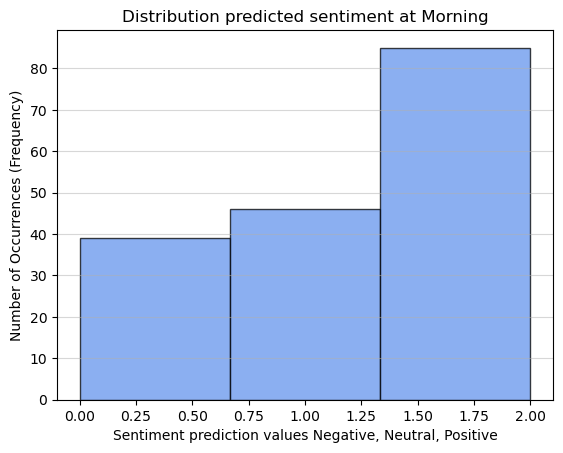

In [127]:
plt.hist(Morn_list_arr,
         bins=3,  # You can specify the number of bins
         color='cornflowerblue',
         edgecolor='black',
         alpha=0.75)

# Add labels and a title
plt.xlabel("Sentiment prediction values Negative, Neutral, Positive")
plt.ylabel("Number of Occurrences (Frequency)")
plt.title("Distribution predicted sentiment at Morning")

# Add a grid for better readability (optional)
plt.grid(axis='y', alpha=0.5)


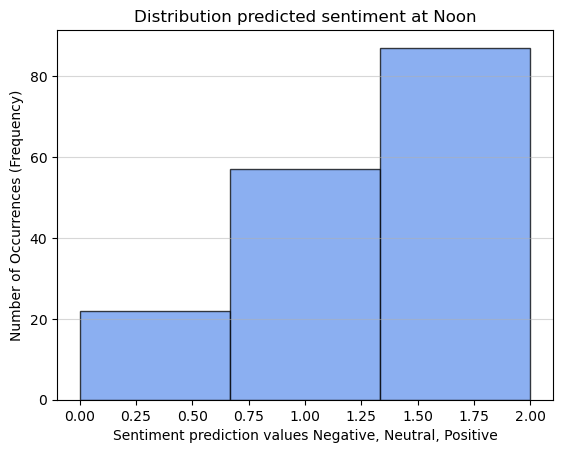

In [129]:
plt.hist(Noon_list_arr,
         bins=3,  # You can specify the number of bins
         color='cornflowerblue',
         edgecolor='black',
         alpha=0.75)

# Add labels and a title
plt.xlabel("Sentiment prediction values Negative, Neutral, Positive")
plt.ylabel("Number of Occurrences (Frequency)")
plt.title("Distribution predicted sentiment at Noon")

# Add a grid for better readability (optional)
plt.grid(axis='y', alpha=0.5)

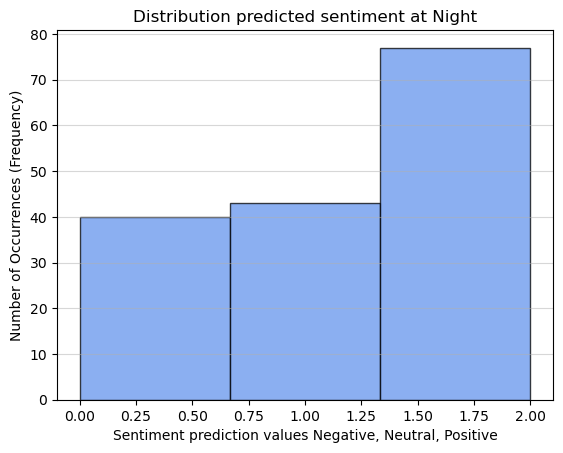

In [131]:
plt.hist(Night_list_arr,
         bins=3,  # You can specify the number of bins
         color='cornflowerblue',
         edgecolor='black',
         alpha=0.75)

# Add labels and a title
plt.xlabel("Sentiment prediction values Negative, Neutral, Positive")
plt.ylabel("Number of Occurrences (Frequency)")
plt.title("Distribution predicted sentiment at Night")

# Add a grid for better readability (optional)
plt.grid(axis='y', alpha=0.5)